# Image Classification - CIFAR 10
A more sophisticated image classification network, employing convolution. Tested on another standard dataset: CIFAR 10.

In [1]:
# Imports
import sys
sys.path.append('../')
from ImageClassifier import ImageClassifier
from BuildingBlocks import DenseBlock, Conv2Dblock
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Loading the fashion data set
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.cifar10.load_data()

In [3]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

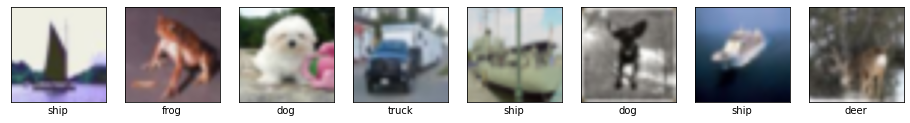

In [4]:
# Pull some rondom sample images to display
fig, axs = plt.subplots(1,8, figsize=(16,2))
for i in range(8):
    r = np.random.randint(xtrain.shape[0])
    axs[i].imshow(xtrain[r], interpolation='gaussian')
    axs[i].set_xlabel(labels[ytrain[r][0]])
    axs[i].set_xticks([]); axs[i].set_yticks([])

In [5]:
# Set up the network:
c1 = Conv2Dblock(16,(4,4)); c2 = Conv2Dblock(8,(2,2))
d1 = DenseBlock([288, 144, 72])
net = ImageClassifier((32,32,3), 10, [c1,c2],[d1])

In [6]:
net.train(xtrain, ytrain, batch=100, epochs=50)

Epoch 1/50
500/500 [==============================] - 18s 35ms/step - loss: 3.2528 - accuracy: 0.2130
Epoch 2/50
500/500 [==============================] - 17s 34ms/step - loss: 1.6105 - accuracy: 0.4227
Epoch 3/50
500/500 [==============================] - 18s 35ms/step - loss: 1.4741 - accuracy: 0.4700
Epoch 4/50
500/500 [==============================] - 17s 34ms/step - loss: 1.3571 - accuracy: 0.5133
Epoch 5/50
500/500 [==============================] - 18s 35ms/step - loss: 1.2850 - accuracy: 0.5397
Epoch 6/50
500/500 [==============================] - 18s 36ms/step - loss: 1.1951 - accuracy: 0.5741
Epoch 7/50
500/500 [==============================] - 18s 36ms/step - loss: 1.1219 - accuracy: 0.6023
Epoch 8/50
500/500 [==============================] - 18s 36ms/step - loss: 1.0552 - accuracy: 0.6248
Epoch 9/50
500/500 [==============================] - 18s 36ms/step - loss: 0.9829 - accuracy: 0.6515
Epoch 10/50
500/500 [==============================] - 18s 37ms/step - loss: 0.935

Text(0.5, 0, 'Epoch')

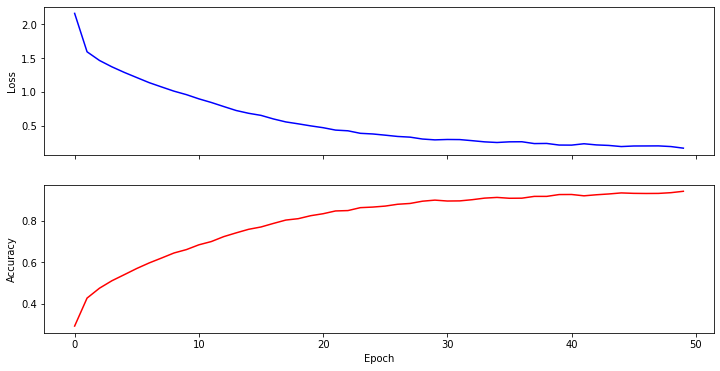

In [7]:
# A look at the loss/accuracy
fig, axs = plt.subplots(2,1, figsize=(12,6), sharex=True)
axs[0].plot(net.loss, c='b'); axs[0].set_ylabel("Loss")
axs[1].plot(net.accuracy, c='r'); axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Epoch")

In [8]:
# Let's take a look at the model arch and dimensions, since it's not always obvious
net.model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 29, 29, 16)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 8)         520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 288)               83232 

In [13]:
# Evaluating based on training data
net.model.evaluate(xtrain, ytrain)

1563/1563 [==============================] - 8s 5ms/step - loss: 0.1518 - accuracy: 0.9491


[0.15180359780788422, 0.9490799903869629]

In [9]:
# Evaluating based on test data
net.model.evaluate(xtest, ytest)

313/313 [==============================] - 2s 5ms/step - loss: 3.9198 - accuracy: 0.5143


[3.9198036193847656, 0.5142999887466431]

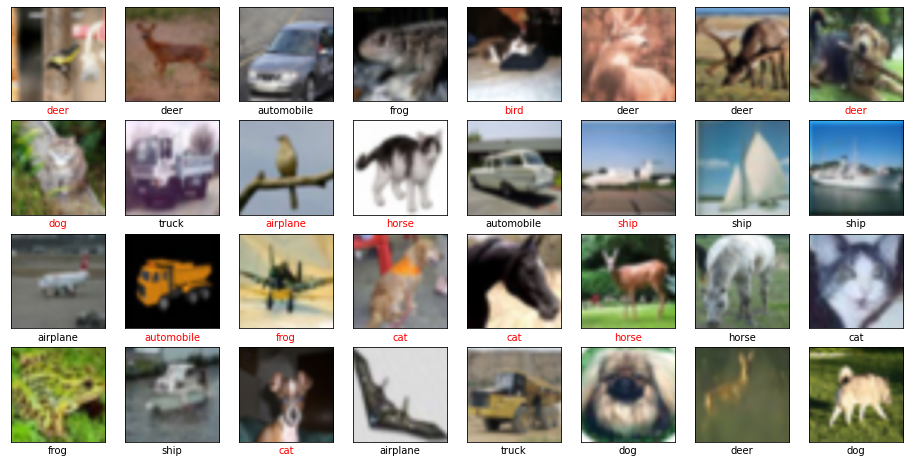

In [10]:
# sample some of the predictions
fig, axs = plt.subplots(4,8, figsize=(16,8), sharex=False)
r = np.random.choice(xtest.shape[0], size=4*8, replace=False)
pred = net.predict(xtest[r])
for i, j in np.ndindex((4,8)):
    k = i*8+j # linear index
    axs[i][j].imshow(xtest[r[k]], interpolation='gaussian')
    color = 'k' if pred[k] == ytest[r[k]][0] else 'r'
    axs[i][j].set_xlabel(labels[pred[k]], c=color)
    axs[i][j].set_xticks([]); axs[i][j].set_yticks([])

## Conclusion (for now)
The good news is everything works, more or less. The bad news is that this model I've built as an example way over-fits to the training data, as evidenced by disparity in loss/accuracy between evaluating on the training and test sets.

I'm going to have to learn more on how to construct a model that avoids this, but at least the archetecture is all in place now me to experiment.